In [1]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Data preprocessing 

In [2]:
# Read the dataset
df = pd.read_csv(r"C:\Users\Owner\Desktop\Viktoriia\UofT\team_project\02_activities\combined_table.csv")

In [4]:
# Return first 5 rows for checking
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [5]:
# Return last 5 rows
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France
1067370,581587,POST,POSTAGE,1,12/9/2011 12:50,18.00,12680.0,France


In [6]:
# Check the size of dataframe: numbers of rows and columns
df.shape

(1067371, 8)

In [7]:
# Check the strucure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [8]:
# Finding missing values
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [9]:
# Percentage of missing values
df.isnull().sum()/df.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

In [10]:
# Choose the method of inputting missing values
# We have only missing values in Description & Customer ID. Customer ID should be unique, so drop the missing rows instead of filling them.

df = df.dropna(subset=['Customer ID'])

In [11]:
# Check the missing values again
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [12]:
# Check existing duplicates
df.duplicated().sum()

26479

In [13]:
# Remove the duplicates
df = df.drop_duplicates()

In [14]:
# Check existing duplicates again
df.duplicated().sum()

0

In [15]:
# Check the garbage values
for i in df.select_dtypes(include="object").columns:
    print(df[i].value_counts())
    print("********")

Invoice
576339     542
579196     533
580727     529
578270     442
573576     435
          ... 
C554535      1
C554536      1
C554541      1
C499791      1
526633       1
Name: count, Length: 44876, dtype: int64
********
StockCode
85123A    5156
22423     3678
85099B    3380
84879     2709
20725     2686
          ... 
35915A       1
21852        1
35945        1
90052        1
21585        1
Name: count, Length: 4646, dtype: int64
********
Description
WHITE HANGING HEART T-LIGHT HOLDER     5149
REGENCY CAKESTAND 3 TIER               3678
JUMBO BAG RED RETROSPOT                2713
ASSORTED COLOUR BIRD ORNAMENT          2709
PARTY BUNTING                          2121
                                       ... 
BISCUIT TIN, MINT,IVORY, VINTAGE          1
CHUNKY CRACKED GLAZE NECKLACE IVORY       1
SET OF KITCHEN WALL  STICKERS             1
ANGEL ON KNEES METAL POLE 100CM H         1
SET OF 4 KNICK KNACK TINS  DOILEY         1
Name: count, Length: 5257, dtype: int64
********
InvoiceD

In [16]:
# Two unappropriate values were found in our dataset
# Delete rows with 'Unspecified' country
df = df.loc[df['Country'] != 'Unspecified']

# Delete rows with name "European Community" (61 rows)
df = df.loc[df['Country'] != 'European Community']

In [17]:
# Check the list of the countries
df['Country'].unique()

array(['United Kingdom', 'France', 'USA', 'Belgium', 'Australia', 'EIRE',
       'Germany', 'Portugal', 'Japan', 'Denmark', 'Netherlands', 'Poland',
       'Spain', 'Channel Islands', 'Italy', 'Cyprus', 'Greece', 'Norway',
       'Austria', 'Sweden', 'United Arab Emirates', 'Finland',
       'Switzerland', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain',
       'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea',
       'Brazil', 'Canada', 'Iceland', 'Lebanon', 'Saudi Arabia',
       'Czech Republic'], dtype=object)

In [18]:
# Check the structure of the dataset after manipulation 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797303 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797303 non-null  object 
 1   StockCode    797303 non-null  object 
 2   Description  797303 non-null  object 
 3   Quantity     797303 non-null  int64  
 4   InvoiceDate  797303 non-null  object 
 5   Price        797303 non-null  float64
 6   Customer ID  797303 non-null  float64
 7   Country      797303 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.7+ MB


# Data analysis

## Part 1

We are interested to know: 
- which countries have the widest customer base; 
- how the customer base has changed during 2009 - 2011 in different markets.

In [19]:
# Convert InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [20]:
# Add a new column 'Year" to the dataframe based on the InvoiceDate 
df["Year"] = df["InvoiceDate"].dt.year
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,2009


In [21]:
# Check the data in "Year" column
df['Year'].unique()

array([2009, 2010, 2011])

In [22]:
# Grouping customers by Country per year
group_df = (
    df.groupby(["Country", "Year"])["Customer ID"]
    .nunique()  # The number of unique customers
    .reset_index(name="Total_Customers"))  # Create a new column with total number of clients
print(group_df)

                 Country  Year  Total_Customers
0              Australia  2009                3
1              Australia  2010               15
2              Australia  2011                9
3                Austria  2009                2
4                Austria  2010               10
..                   ...   ...              ...
88  United Arab Emirates  2011                2
89        United Kingdom  2009              986
90        United Kingdom  2010             3940
91        United Kingdom  2011             3835
92           West Indies  2010                1

[93 rows x 3 columns]


In [23]:
# Create the pivot table with separated years 
group_pivot = group_df.pivot(index="Country", columns="Year", values="Total_Customers")
group_pivot.head()

Year,2009,2010,2011
Country,,,
Australia,3.0,15.0,9.0
Austria,2.0,10.0,10.0
Bahrain,NaN,2.0,2.0
Belgium,2.0,17.0,25.0
Brazil,NaN,1.0,1.0


In [24]:
# Change the Nan values in the pivot table to the 0 and return the numbers to the integers
group_pivot = group_pivot.fillna(0).astype(int)
group_pivot

Year,2009,2010,2011
Country,,,
Australia,3,15,9
Austria,2,10,10
Bahrain,0,2,2
Belgium,2,17,25
Brazil,0,1,1
Canada,0,1,4
Channel Islands,1,12,8
Cyprus,3,8,8
Czech Republic,0,0,1


In [25]:
# Check the format of column names
print(group_pivot.columns)

Index([2009, 2010, 2011], dtype='int32', name='Year')


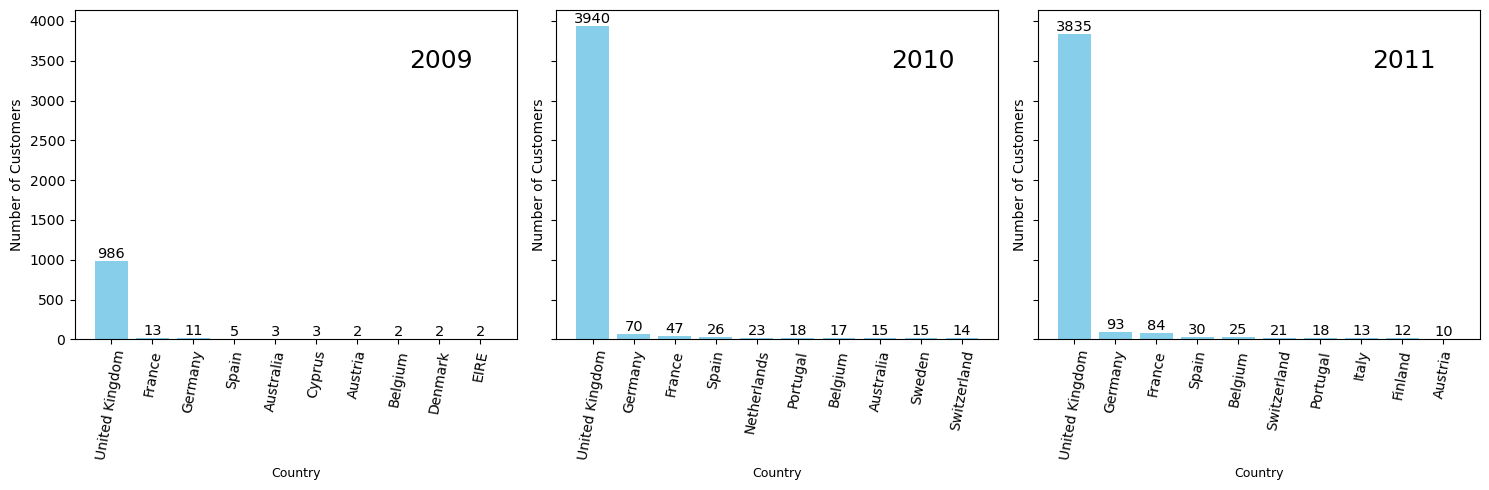

In [26]:
# Make the visualization of the largest countries markets year by year
def plot_top_10(group_pivot, year, ax):
    year_data = group_pivot[year]  # extract data by year
    top_10 = year_data.nlargest(10)  # find 5 countries with largest customer base
    bars = ax.bar(top_10.index, top_10.values, color='skyblue') # create bars graph
    ax.bar_label(bars, fontsize=10.5, padding=0, color='black')   # modify bar_labels
    ax.set_title(f'{year}', fontsize=18, loc='right', y=0.8, x=0.9)  # modify title
    ax.set_ylabel('Number of Customers')  # modify ylabels
    ax.set_xlabel('Country', fontsize=9)  # modify xlabels
    ax.set_xticks(top_10.index)  # set ticks
    ax.set_xticklabels(top_10.index, rotation=80)  # modify ticks

# Creat subplots for 3 years
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

for i, year in enumerate([2009, 2010, 2011]):
    plot_top_10(group_pivot, year, axes[i])

plt.tight_layout()
plt.show()

In [27]:
# We want to know the total amount of customers at company year by year for understanding full trend
# Make additional row "Total" in our table
total_customers = group_pivot.sum()
group_pivot.loc['Total'] = total_customers
group_pivot

Year,2009,2010,2011
Country,,,
Australia,3,15,9
Austria,2,10,10
Bahrain,0,2,2
Belgium,2,17,25
Brazil,0,1,1
Canada,0,1,4
Channel Islands,1,12,8
Cyprus,3,8,8
Czech Republic,0,0,1


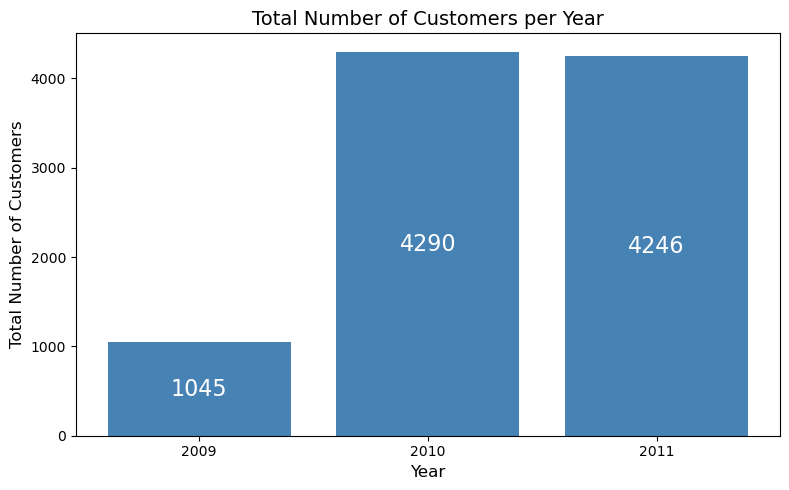

In [28]:
# Make the visualization for comparing total numbers of customers
# Extract data for the plot 
total_customers = group_pivot.loc['Total']  # extract total amounts from the table

# Create a plot
plt.figure(figsize=(8, 5))  # set the size of the plot
bars = plt.bar(total_customers.index, total_customers.values, color='steelblue')   # create bar graph

# Modify the graph features
plt.bar_label(bars, label_type='center', fontsize=16, color='white')
plt.title('Total Number of Customers per Year', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Number of Customers', fontsize=12)
plt.xticks(total_customers.index)
plt.tight_layout()

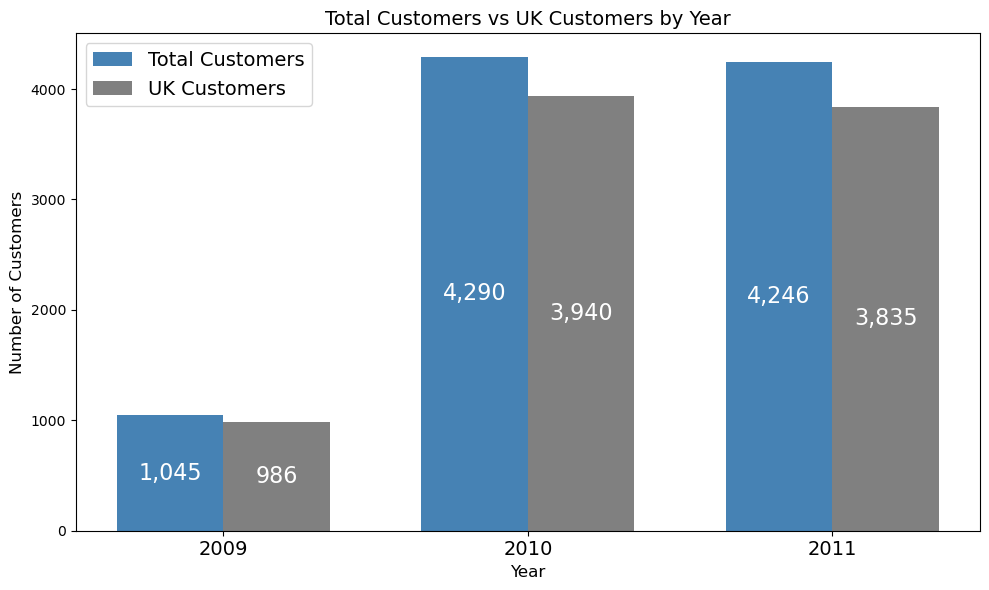

In [29]:
# Make the visualization for comparing total numbers of customers and UK customers
# Extract data for the plot
total_customers = group_pivot.loc['Total']  
uk_customers = group_pivot.loc['United Kingdom']

# Create a plot
plt.figure(figsize=(10, 6))  # set the size of the plot
width = 0.35  # width of bars

# Group the bars by the years
years = total_customers.index
x = range(len(years))

# Create bar plots
bars1 = plt.bar(x, total_customers, width=width, label='Total Customers', color='steelblue')
bars2 = plt.bar([i + width for i in x], uk_customers, width=width, label='UK Customers', color='grey')
plt.bar_label(bars1, labels=[f'{val:,}' for val in total_customers], label_type='center', fontsize=16, color='white')
plt.bar_label(bars2, labels=[f'{val:,}' for val in uk_customers], label_type='center', fontsize=16, color='white')

# Modify labels
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Total Customers vs UK Customers by Year', fontsize=14)
plt.xticks([i + width / 2 for i in x], years, fontsize=14)  
plt.legend(fontsize=14)

plt.tight_layout()
plt.show()

In [30]:
# Calculate Absolute Growth to define how the number of clients has changed over the 2009 - 2011. Add these features to the table. 
# We do not use the Normalized Absolute Growth or %-comparing because there are big differences in numbers which give us not relevant results

group_pivot['Absolute_Growth'] = group_pivot[2011] - group_pivot[2009]
print(group_pivot)

Year                  2009  2010  2011  Absolute_Growth
Country                                                
Australia                3    15     9                6
Austria                  2    10    10                8
Bahrain                  0     2     2                2
Belgium                  2    17    25               23
Brazil                   0     1     1                1
Canada                   0     1     4                4
Channel Islands          1    12     8                7
Cyprus                   3     8     8                5
Czech Republic           0     0     1                1
Denmark                  2     9     9                7
EIRE                     2     5     3                1
Finland                  1     8    12               11
France                  13    47    84               71
Germany                 11    70    93               82
Greece                   1     4     4                3
Iceland                  0     1     1          

In [32]:
# Extract and sort dataframe by the values of Absolute growth. 
growth = group_pivot.reset_index()
growth = growth[growth['Country'] != 'Total'][['Country', 'Absolute_Growth']].sort_values(by='Absolute_Growth', ascending=False)
growth.head(10)

Year,Country,Absolute_Growth
37,United Kingdom,2849
13,Germany,82
12,France,71
31,Spain,25
3,Belgium,23
33,Switzerland,20
27,Portugal,16
11,Finland,11
17,Italy,11
25,Norway,9


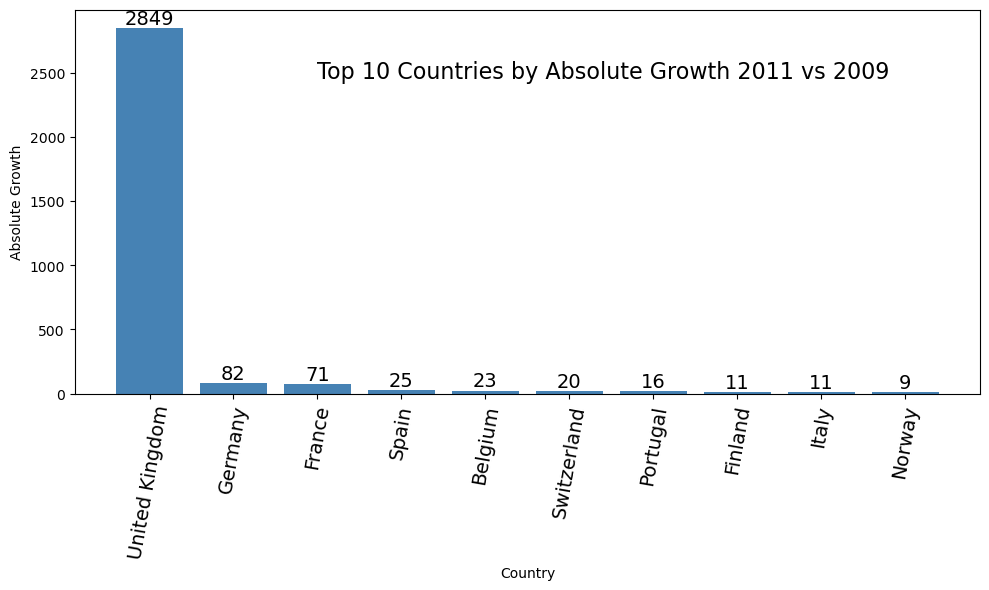

In [33]:
# Make the visualization TOP 10 Countries by Absolute Growth
# Extract dataframe with top10 countries by the absolute growth of customers
growth_top10 = growth.sort_values(by='Absolute_Growth', ascending=False).head(10)

# Create a plot
plt.figure(figsize=(10, 6))
bars = plt.bar(growth_top10['Country'], growth_top10['Absolute_Growth'], color='steelblue')

plt.bar_label(bars, label_type='edge', fontsize=14, color='black')    # Add labels to the bars

# Modify plot
plt.xlabel('Country')
plt.ylabel('Absolute Growth')
plt.title('Top 10 Countries by Absolute Growth 2011 vs 2009', fontsize=16, loc='right', y=0.8, x=0.9)
plt.xticks(rotation=80, fontsize=14)
plt.tight_layout()